<a href="https://colab.research.google.com/github/MdRaselHosen/BlogPost/blob/main/GoogleSearchData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pytrends

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pytrends.request import TrendReq

### setup pytrend library and keyword define

In [ ]:
pytrends = TrendReq(hl='en-US',tz=360)
keyword = 'cloud computing'

### Data Request

In [ ]:
pytrends.build_payload([keyword],cat=0,timeframe='today 12-m', geo='',gprop='')

### Country wise Data

In [ ]:
region_data = pytrends.interest_by_region()
region_data = region_data.sort_values(by=keyword,ascending=False).head(10)

/tmp/ipython-input-1028344816.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_data[keyword],y=region_data.index, palette="Blues_d")


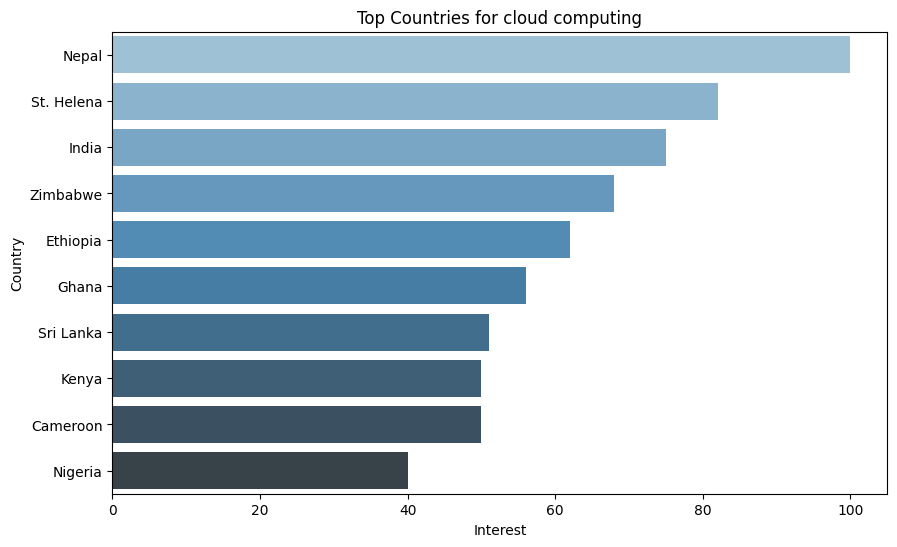

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=region_data[keyword],y=region_data.index, palette="Blues_d")
plt.title(f'Top Countries for {keyword}')
plt.xlabel('Interest')
plt.ylabel('Country')
plt.show()

### World Map

In [ ]:
region_data = region_data.reset_index()
fig = px.choropleth(region_data,
                    locations='geoName',
                    locationmode='country names',
                    color=keyword,
                    title=f"Search interest for '{keyword}' by Country",
                    color_continuous_scale="Blues")
fig.show()

### Time Wise Interest

In [ ]:
time_df = pytrends.interest_over_time()


/usr/local/lib/python3.12/dist-packages/pytrends/request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



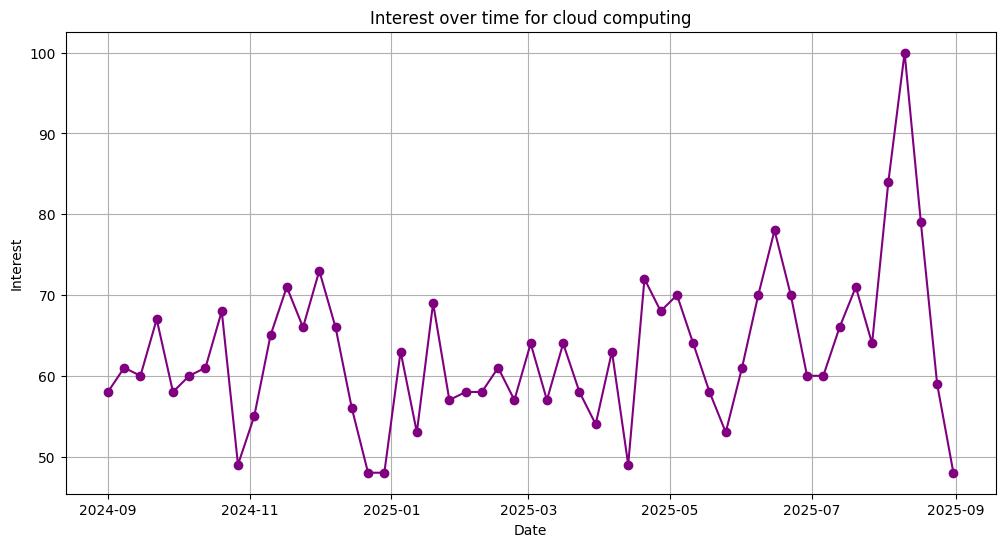

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(time_df.index, time_df[keyword], marker='o',color='purple')
plt.title(f'Interest over time for {keyword}')
plt.xlabel("Date")
plt.ylabel("Interest")
plt.grid(True)
plt.show()

### multiple keywords compare

In [ ]:
kw_list = ['cloud computing','big data','machine learning']
pytrends.build_payload(kw_list, cat=0, timeframe='today 12-m', geo='', gprop='')

/usr/local/lib/python3.12/dist-packages/pytrends/request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



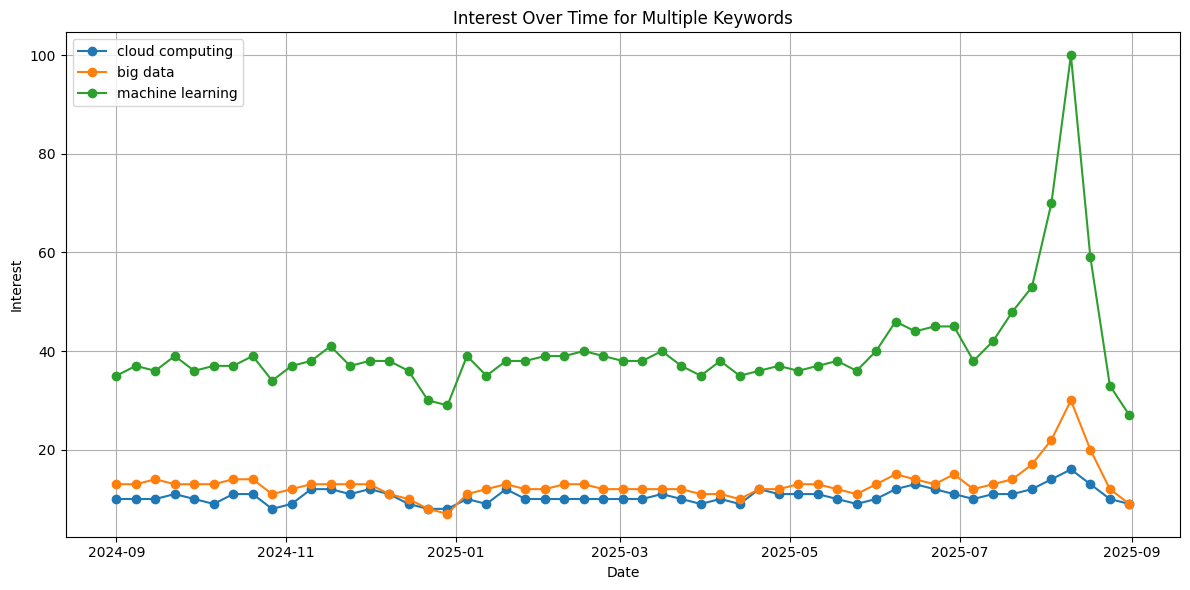

In [ ]:
compare_df = pytrends.interest_over_time()\

plt.figure(figsize=(12,6))
for kw in kw_list:
    plt.plot(compare_df.index, compare_df[kw], marker='o', label=kw)
plt.title('Interest Over Time for Multiple Keywords')
plt.xlabel('Date')
plt.ylabel('Interest')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show();